# 專題分析-台北市房價分析

### ◉資料來源：政府開放資料平台 - 不動產買賣實價登錄批次資料 (http://data.gov.tw/node/6213) - 台北市資料

# 1.資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊

df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5') #台北市
df.sample(5) #隨機取其中5筆資料

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
553,南港區,房地(土地+建物)+車位,臺北市南港區忠孝東路六段121~150號,5.90,住,NaN,NaN,1060323,土地1建物2車位1,五層,十四層,套房(1房1廳1衛),住家用,鋼筋混凝土造,1000110.0,47.37,1,1,1,有,有,13000000,274377.0,升降機械,2.07,0,NaN,RPUOMLRJPHMFFDA68CA
763,大安區,房地(土地+建物)+車位,臺北市大安區大安路一段224巷1~30號,24.70,住,NaN,NaN,1060509,土地1建物1車位1,四層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,750627.0,167.30,4,1,2,有,有,42600000,254617.0,坡道平面,2.71,0,NaN,RPPNMLPKOHMFFFA08CA
95,中山區,房地(土地+建物),臺北市中山區天祥路1~30號,12.82,住,NaN,NaN,1030924,土地2建物1車位0,六層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,1050914.0,69.48,1,1,1,有,有,20210000,290875.0,NaN,0.00,0,NaN,RPVOMLLJOHMFFCA97CA
130,松山區,房地(土地+建物),臺北市松山區南京東路五段291巷5弄1~30號,23.74,住,NaN,NaN,1060426,土地1建物1車位0,四層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,741228.0,93.06,2,2,2,有,無,16650000,178917.0,NaN,0.00,0,NaN,RPPPMLLKPHMFFDA77CA
490,中山區,房地(土地+建物),臺北市中山區林森北路107巷61~90號,6.49,商,NaN,NaN,1060524,土地1建物1車位0,四層,七層,套房(1房1廳1衛),住家用,鋼筋混凝土造,650605.0,37.73,0,0,1,無,有,4850000,128545.0,NaN,0.00,0,NaN,RPRPMLSJOHMFFCA38CA


### ▲欄位摘要

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 28 columns):
鄉鎮市區            841 non-null object
交易標的            841 non-null object
土地區段位置或建物區門牌    841 non-null object
土地移轉總面積平方公尺     841 non-null float64
都市土地使用分區        829 non-null object
非都市土地使用分區       0 non-null float64
非都市土地使用編定       0 non-null float64
交易年月日           841 non-null int64
交易筆棟數           841 non-null object
移轉層次            776 non-null object
總樓層數            774 non-null object
建物型態            841 non-null object
主要用途            747 non-null object
主要建材            775 non-null object
建築完成年月          679 non-null float64
建物移轉總面積平方公尺     841 non-null float64
建物現況格局-房        841 non-null int64
建物現況格局-廳        841 non-null int64
建物現況格局-衛        841 non-null int64
建物現況格局-隔間       841 non-null object
有無管理組織          841 non-null object
總價元             841 non-null int64
單價每平方公尺         796 non-null float64
車位類別            260 non-null object
車位移轉總面積平方公尺     841 non-null float

### ▲各欄位遺失值統計

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
missing_data.head(15)

,筆數,%
非都市土地使用分區,841,100.0
非都市土地使用編定,841,100.0
車位類別,581,69.1
備註,435,51.7
建築完成年月,162,19.3
主要用途,94,11.2
總樓層數,67,8.0
主要建材,66,7.8
移轉層次,65,7.7
單價每平方公尺,45,5.4


### 》結論： 非都市土地使用分區/非都市土地使用編定/車位類別/備註  可於資料預處理時將這些欄位砍掉 
初步判斷這些遺失值過多的欄位與此次分析結果的相觀性不高

# 2.資料預處理

### ▲交易標的：非土地、車位交易

In [4]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
土地,215.995593,NaN,NaN,1.059181e+06,NaN,0.000000,0.000000,0.000000,0.000000,7.343879e+06,123041.372881,0.000000,0.000000e+00
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,5.636200e+06,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1.472509e+07,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4.283112e+07,191406.018605,34.382361,1.393102e+06
車位,2.486136,NaN,NaN,1.060058e+06,908492.702703,41.700682,0.000000,0.000000,0.000000,2.502386e+06,NaN,30.595227,2.368295e+06


### ▲都市土地使用分區：住、其他、商、工、農

In [5]:
df.groupby('都市土地使用分區').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
都市土地使用分區,,,,,,,,,,,,,
住,33.650335,NaN,NaN,1.059414e+06,819776.175127,119.547987,2.358491,1.490566,1.433962,2.076854e+07,167962.145695,10.427883,4.271384e+05
其他,121.896582,NaN,NaN,1.059361e+06,863087.157895,70.172405,0.797468,0.582278,0.569620,1.266451e+07,120907.200000,7.432025,2.351899e+05
商,15.158623,NaN,NaN,1.059629e+06,857005.548387,104.563117,1.753036,1.194332,1.246964,2.158200e+07,194409.745763,8.087004,5.162348e+05
工,52.205909,NaN,NaN,1.059568e+06,934172.850000,309.543636,1.136364,0.636364,0.681818,4.634864e+07,142978.388889,41.173636,1.777273e+06
農,430.670000,NaN,NaN,1.060426e+06,NaN,0.000000,0.000000,0.000000,0.000000,1.511723e+07,40607.500000,0.000000,0.000000e+00


In [6]:
df['都市土地使用分區'] = df['都市土地使用分區'].replace({'住':1,'其他':2,'商':3,
                                '工':4,'農':5})

### ▲建物型態

In [7]:
#df.groupby('建物型態').mean()

### ▲建物型態轉換

In [8]:
#df['建物型態'] = df['建物型態'].replace({'住宅大樓(11層含以上有電梯)':1,'倉庫':2,'公寓(5樓含以下無電梯)':3,
#                                '其他':4,'套房(1房1廳1衛)':5,'店面(店鋪)':6,'廠辦':7,'華廈(10層含以下有電梯)':8,
#                                 '辦公商業大樓':9,'透天厝':10})

In [9]:
# 去除土地和車位兩種交易資料
# df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)

In [10]:
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 #改成以萬為單位，方便圖表顯示

In [11]:
#df.sample(1)

In [12]:
print(df.loc[0,'交易年月日'])
print(type(df.loc[0,'交易年月日']))

1040303
<class 'numpy.int64'>


In [13]:
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)

In [14]:
print(df.loc[0,'建築完成年月'])
print(type(df.loc[0,'建築完成年月']))

831111.0
<class 'numpy.float64'>


In [15]:
from datetime import datetime
now = datetime.now()
now.year #(年,月,日,時,分,秒,微秒) ps: 微秒(microseconds)=1/1000000秒

2018

In [16]:
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)

In [17]:
#df.sample(1)

## 2-2.資料探索

### ▲各鄉鎮資料筆數

Text(0,0.5,'資料筆數')

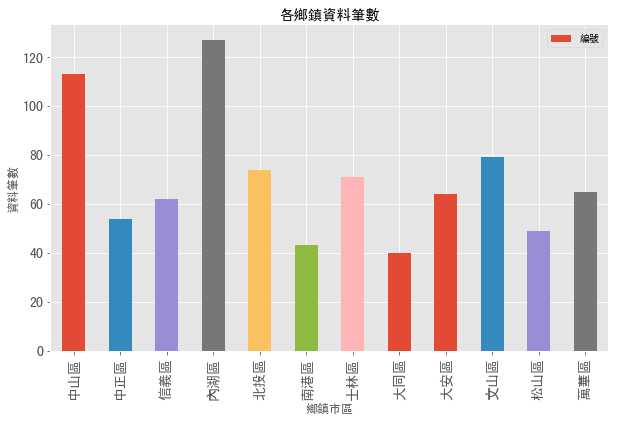

In [18]:
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(10,6),fontsize=14,title='各鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

In [19]:
#df['鄉鎮市區'] = df['鄉鎮市區'].replace({'中山區':1,'中正區':2,'信義區':3,
#                                '內湖區':4,'北投區':5,'南港區':6,'士林區':7,'大同區':8,
#                                 '大安區':9,'文山區':10,'松山區':11,'萬華區':12})

In [20]:
#df

## 2-3.相關性分析

In [21]:
corr = df[['總價元','鄉鎮市區','建物型態','都市土地使用分區','土地移轉總面積平方公尺','建物移轉總面積平方公尺',
           '建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年']].corr()
corr

,總價元,都市土地使用分區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年
總價元,1.000000,0.050559,0.126101,0.891250,0.122413,0.061610,0.144744,0.405508,0.427849,-0.323922,0.323922,-0.043546
都市土地使用分區,0.050559,1.000000,0.014329,0.019415,-0.238561,-0.233225,-0.157461,0.029506,0.068544,-0.152892,0.152892,0.027413
土地移轉總面積平方公尺,0.126101,0.014329,1.000000,0.080073,-0.062838,-0.093540,-0.070646,-0.001123,-0.001243,-0.064461,0.064461,-0.049830
建物移轉總面積平方公尺,0.891250,0.019415,0.080073,1.000000,0.178242,0.110541,0.164372,0.415497,0.336646,-0.280110,0.280110,-0.045614
建物現況格局-房,0.122413,-0.238561,-0.062838,0.178242,1.000000,0.752424,0.817762,-0.004503,-0.071236,0.132107,-0.132107,-0.031167
建物現況格局-廳,0.061610,-0.233225,-0.093540,0.110541,0.752424,1.000000,0.667178,-0.056795,-0.127471,0.091690,-0.091690,-0.005417
建物現況格局-衛,0.144744,-0.157461,-0.070646,0.164372,0.817762,0.667178,1.000000,-0.010240,-0.069450,0.018843,-0.018843,-0.063467
車位移轉總面積平方公尺,0.405508,0.029506,-0.001123,0.415497,-0.004503,-0.056795,-0.010240,1.000000,0.772742,-0.458582,0.458582,-0.075538
車位總價元,0.427849,0.068544,-0.001243,0.336646,-0.071236,-0.127471,-0.069450,0.772742,1.000000,-0.361603,0.361603,-0.041483
屋齡,-0.323922,-0.152892,-0.064461,-0.280110,0.132107,0.091690,0.018843,-0.458582,-0.361603,1.000000,-1.000000,0.132450


In [22]:
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    return ['background-color: yellow' if v else '' for v in is_high]

In [23]:
df.corr().round(3).style.apply(highlight_highcorr)

,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元,交易年,建築完成年,屋齡
土地移轉總面積平方公尺,1,0.014,nan,nan,-0.048,0.064,0.08,-0.063,-0.094,-0.071,0.126,-0.126,-0.001,-0.001,-0.05,0.064,-0.064
都市土地使用分區,0.014,1,nan,nan,0.027,0.153,0.019,-0.239,-0.233,-0.157,0.051,0.061,0.03,0.069,0.027,0.153,-0.153
非都市土地使用分區,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
非都市土地使用編定,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
交易年月日,-0.048,0.027,nan,nan,1,-0.135,-0.047,-0.034,-0.008,-0.066,-0.046,-0.035,-0.075,-0.041,1,-0.135,0.135
建築完成年月,0.064,0.153,nan,nan,-0.135,1,0.28,-0.132,-0.092,-0.019,0.324,0.362,0.459,0.362,-0.133,1,-1
建物移轉總面積平方公尺,0.08,0.019,nan,nan,-0.047,0.28,1,0.178,0.111,0.164,0.891,0.148,0.415,0.337,-0.046,0.28,-0.28
建物現況格局-房,-0.063,-0.239,nan,nan,-0.034,-0.132,0.178,1,0.752,0.818,0.122,0.021,-0.005,-0.071,-0.031,-0.132,0.132
建物現況格局-廳,-0.094,-0.233,nan,nan,-0.008,-0.092,0.111,0.752,1,0.667,0.062,0.076,-0.057,-0.127,-0.005,-0.092,0.092
建物現況格局-衛,-0.071,-0.157,nan,nan,-0.066,-0.019,0.164,0.818,0.667,1,0.145,0.118,-0.01,-0.069,-0.063,-0.019,0.019


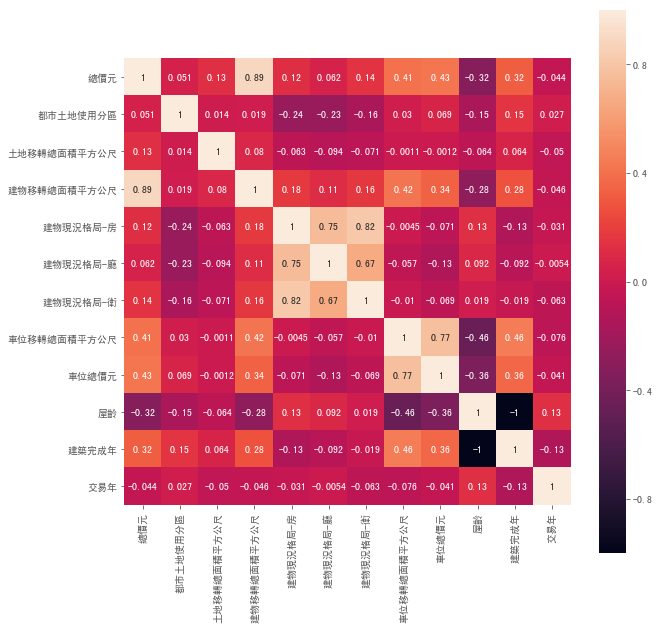

In [24]:
import seaborn as sns
plt.rcParams['font.family']='SimHei' #顯示中文
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)
plt.show()

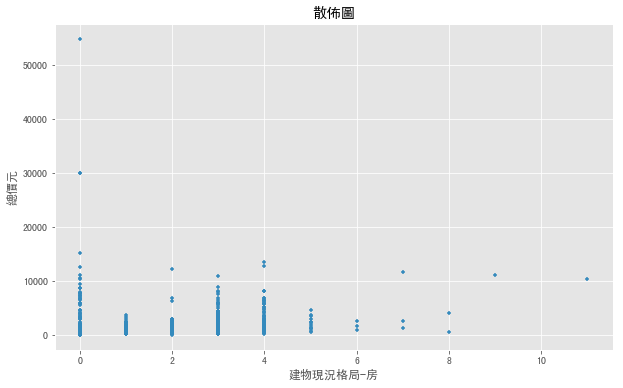

In [25]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-房',y='總價元',marker='+')

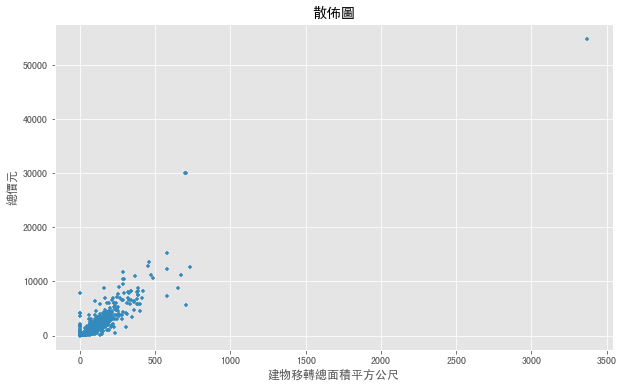

In [26]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物移轉總面積平方公尺',y='總價元',marker='+')

In [27]:
#df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='鄉鎮市區',y='總價元',marker='+')

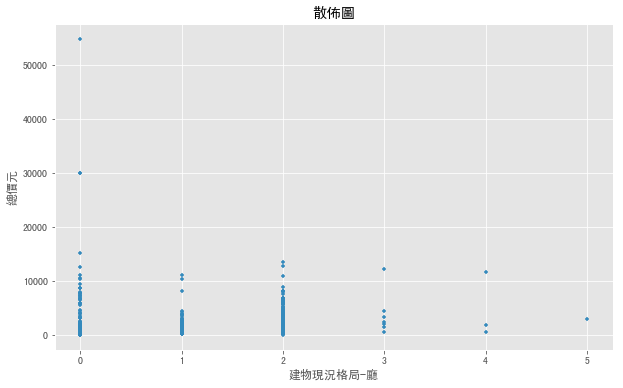

In [28]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-廳',y='總價元',marker='+')

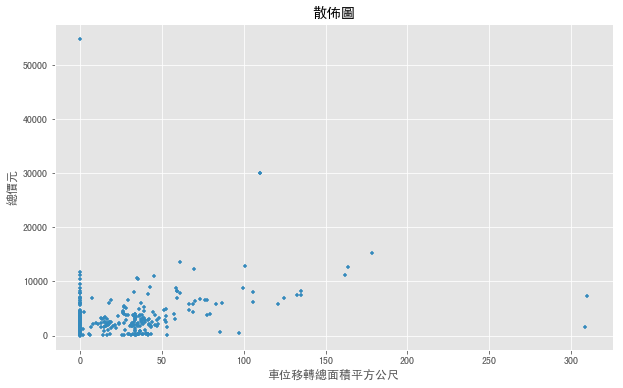

In [29]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='車位移轉總面積平方公尺',y='總價元',marker='+')

### ▲各鄉鎮比較

In [30]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元
鄉鎮市區,,,,,,,,,,,,
中山區,15.890442,101.426195,181798.377358,1.911504,1.265487,1.398230,10.886903,679292.035398,20.969697,86.030303,105.911504,1995.253853
中正區,16.581852,101.396296,199380.440000,1.518519,1.018519,1.055556,5.247778,356296.296296,22.761905,84.238095,105.833333,2219.059519
信義區,25.934839,117.622903,186657.172414,2.048387,1.290323,1.306452,10.348065,438790.322581,28.704545,78.295455,105.951613,2111.870113
內湖區,70.540079,166.616220,169604.917355,2.283465,1.385827,1.401575,16.628740,498188.976378,20.025424,86.974576,105.661417,2703.266577
北投區,74.827432,108.905000,128572.684932,1.662162,1.108108,1.094595,14.411351,633108.108108,20.016667,86.983333,105.864865,1768.484626
南港區,31.415349,128.813721,162680.815789,1.813953,1.209302,1.186047,16.563488,741860.465116,13.870968,93.129032,105.976744,2151.740516
士林區,70.117746,117.504648,161196.242424,1.788732,1.211268,1.197183,14.327606,890140.845070,28.133333,78.866667,106.000000,2735.869299
大同區,15.805500,95.883000,139050.735294,1.825000,1.200000,1.075000,9.238750,548000.000000,21.437500,85.562500,105.925000,1317.584220
大安區,23.651719,109.383281,230250.761905,1.859375,1.234375,1.203125,6.088906,271875.000000,24.405405,82.594595,105.968750,2694.109211


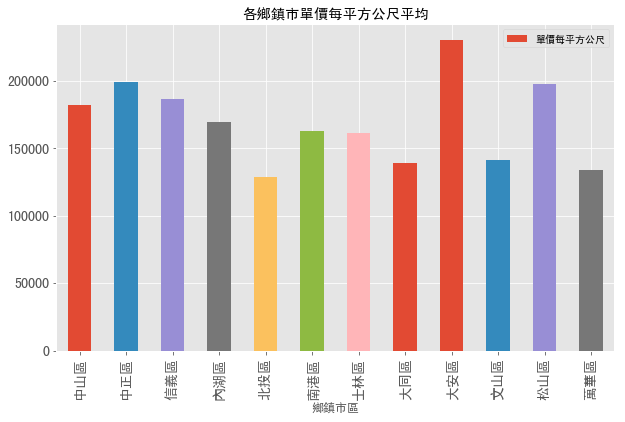

In [31]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar',y='單價每平方公尺',figsize=(10,6),fontsize=14,title='各鄉鎮市單價每平方公尺平均')

# 3.資料預處理 - 機器學習

### ▲針對鄉鎮市區做one-hot encoding 

In [32]:
df_region = pd.get_dummies(df['鄉鎮市區'])
df_region.head()

,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [33]:
df_ml = pd.merge(df2,df_region,left_index=True,right_index=True)
#df_ml.head()

### ▲去除遺失值和極端值

In [34]:
df_ml = df_ml.dropna().reset_index(drop=True)

In [35]:
df_ml = df_ml[df_ml['建物移轉總面積平方公尺']<1000]

In [36]:
#df_ml = df_ml[df_ml['土地移轉總面積平方公尺']<70]

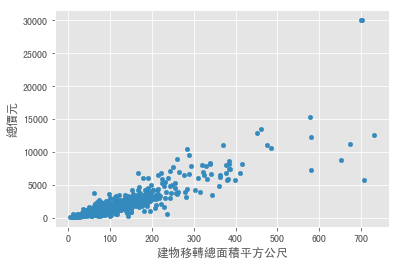

In [37]:
df_ml.plot(kind='scatter',x='建物移轉總面積平方公尺',y='總價元')

In [38]:
#df_ml.plot(kind='scatter',x='土地移轉總面積平方公尺',y='總價元')

# 4.使用線性迴歸演算法進行專題分析

## 4-1.簡單線性迴歸-使用Scikit-Learn SGDRegressor

### ▲切分訓練及測試資料 (1 feature)

In [39]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
88,122.10
142,36.40
82,100.89
220,118.94
381,190.40


### ▲特徵標準化(Standardization)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

各變項參數: [2288.01651485]
MSE: 1069301.00
R Square: 0.7983830232270301


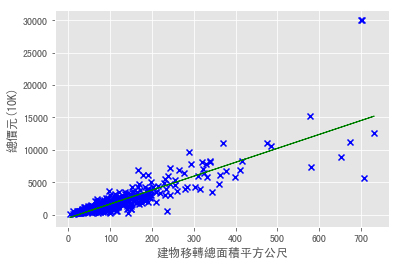

In [41]:
from sklearn import datasets, linear_model

#SGDRegressor的input y需要一維矩陣type
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# linear regression 物件
sgdr = linear_model.SGDRegressor(max_iter=10,learning_rate='constant',eta0=0.001)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test))

plt.scatter(X_train['建物移轉總面積平方公尺'], y_train_1d,  color='blue', marker = 'x')

plt.plot(X_train, sgdr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

### ▲K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve)

In [42]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

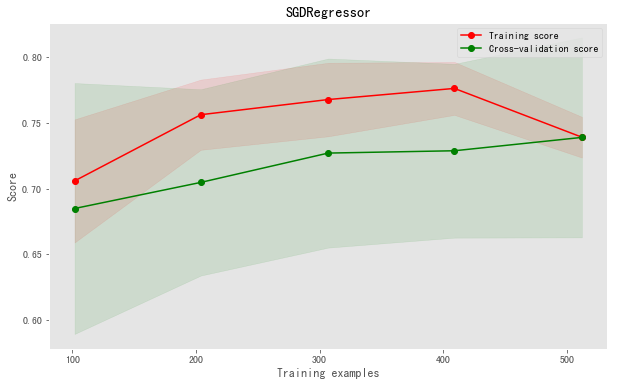

In [43]:
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=5, random_state=None, shuffle=True)
estimator = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

sc.fit(X_train)
plot_learning_curve(estimator, "SGDRegressor", 
                    sc.transform(X), y.values.ravel(), cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 4-2.簡單線性迴歸-使用Scikit-Learn LinearRegression

各變項參數: [[2338.34428708]]
MSE: 1068144.24
R Square: 0.7986011319892868


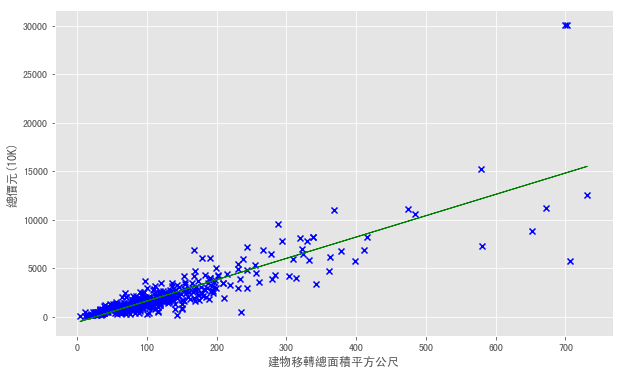

In [44]:
# linear regression
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized,y_test))

plt.figure(figsize=(10,6))  #調整作圖大小
plt.scatter(X_train['建物移轉總面積平方公尺'], y_train['總價元'],  color='blue', marker = 'x')
plt.plot(X_train['建物移轉總面積平方公尺'], regr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

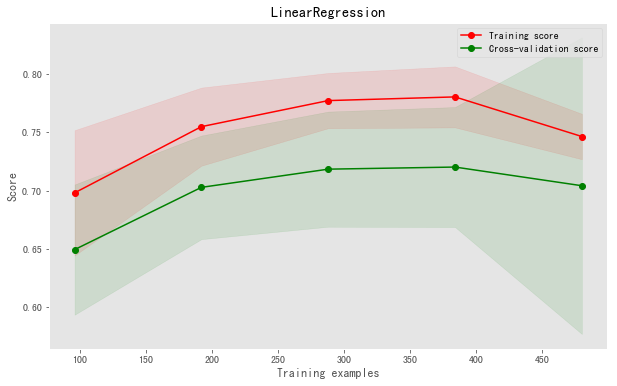

In [45]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "LinearRegression", sc.transform(X), 
                    y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

各變項參數: [[2338.34428708]]
MSE: 1068144.24
R Square: 0.7986011319892868


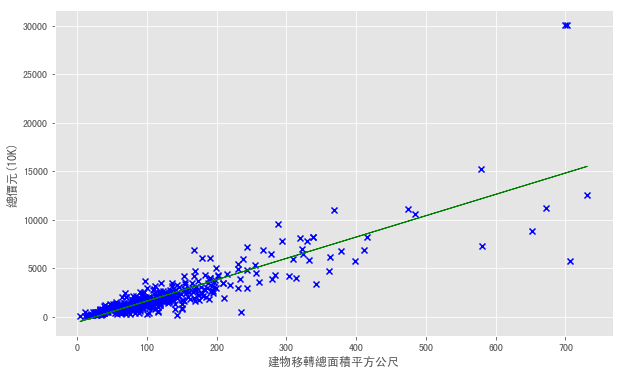

In [46]:
# linear regression
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized,y_test))

plt.figure(figsize=(10,6))  #調整作圖大小
plt.scatter(X_train['建物移轉總面積平方公尺'], y_train['總價元'],  color='blue', marker = 'x')
plt.plot(X_train['建物移轉總面積平方公尺'], regr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

# 5.多變項線性迴歸

### ▲切分訓練及測試資料 (5 features)

In [47]:
X = df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','車位移轉總面積平方公尺','車位總價元','屋齡']]
y = df_ml[['總價元']]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,土地移轉總面積平方公尺,車位移轉總面積平方公尺,車位總價元,屋齡
405,73.93,20.50,0.00,0,45.0
31,98.43,31.04,0.00,0,37.0
578,53.56,4.96,0.00,0,37.0
389,173.35,131.54,0.00,0,20.0
380,190.40,12.22,33.33,2700000,2.0


### ▲特徵標準化 (Standardization)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

### 5-1.多變項線性迴歸-使用Scikit-Learn LinearRegression

In [50]:
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized, y_test))

各變項參數: [[2459.05837053 -392.09850322 -840.56301737 1158.1379859   -99.94713222]]
MSE: 993613.84
R Square: 0.7802320946507856


<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

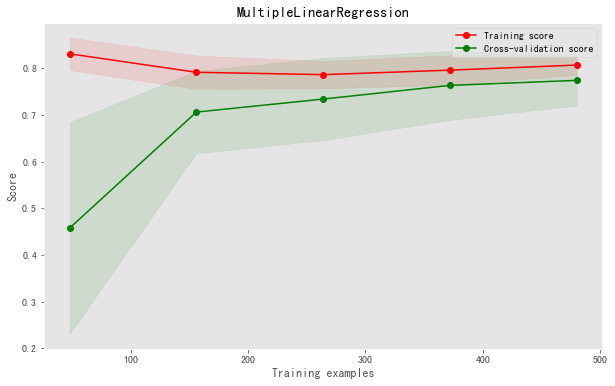

In [51]:
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "MultipleLinearRegression", 
                    sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))

### 5-2.多變項線性迴歸-使用Scikit-Learn SGDRegressor

In [52]:
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# SGD Regressor 
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test_1d))

各變項參數: [2386.87251638 -462.61613886 -998.90771023 1098.3412204   -57.13208201]
MSE: 1121194.71
R Square: 0.7520137069703311


<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

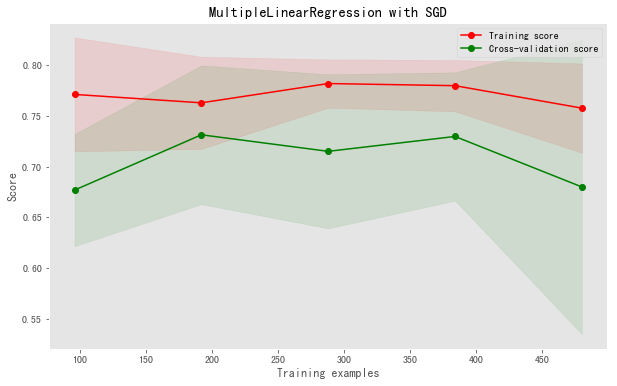

In [53]:
from sklearn.model_selection import ShuffleSplit
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", 
                    sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

# 6.多項式(Polynomial) 非線性迴歸

### ▲切分訓練及測試資料 (1 feature)

In [54]:
from sklearn.model_selection import train_test_split
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
129,24.72
173,182.43
629,293.20
413,48.48
270,78.55


### ▲創造高次方變項

各變項參數: 
 [[0.00000000e+00 1.49754396e+01 1.49701528e-02]]
MSE: 876665.21
R Square: 0.8006967260053183


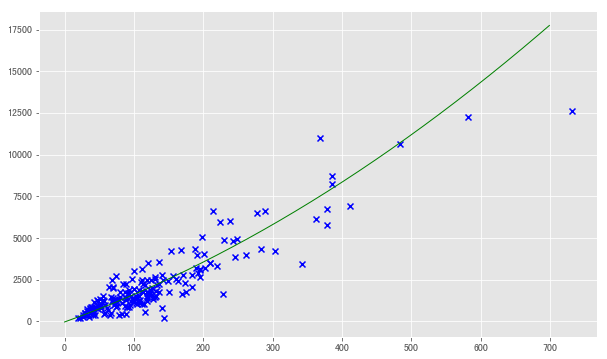

In [55]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy() #原始X_train
X_test_raw = X_test.copy() #原始X_test
X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",regr.score(X_test_poly, y_test))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(X_test_raw['建物移轉總面積平方公尺'], y_test['總價元'],  color='blue', marker = 'x')

X_fit = pd.DataFrame(np.arange(0,700,1)) #作圖用
plt.plot(X_fit, regr.predict(quadratic.fit_transform(X_fit)), color='green', linewidth=1)


plt.show()



In [56]:
quadratic = PolynomialFeatures(degree=2)
X_raw = X.copy() #原始X_train
X_poly = quadratic.fit_transform(X_raw) #產生x^0, x^1, x^2

<module 'matplotlib.pyplot' from '/Users/anna/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

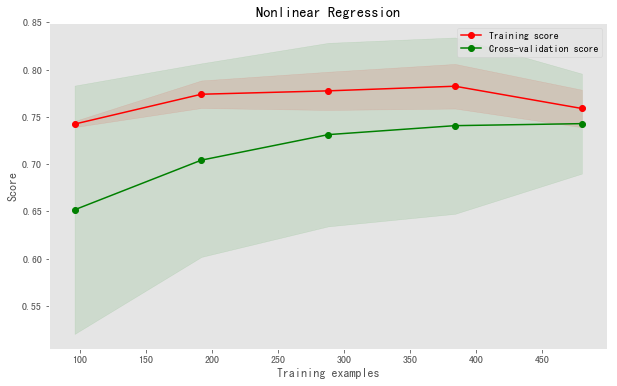

In [57]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5))

# 7.自造簡單線性迴歸 Gradient Descent

In [58]:
def computeCost(X, y, weight=np.array([[0,0]])):
    m = y.size
    J = 0
    h = X.dot(weight)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

def gradientDescent(X, y, weight=np.array([[0,0]]), alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iters in np.arange(num_iters):
        h = X.dot(weight)
        weight = weight - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iters] = computeCost(X, y, weight)
    return(weight, J_history)

In [59]:
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
572,100.77
566,37.75
189,230.72
506,91.72
56,57.95


In [60]:
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)

weight:  [2184.96983185 2184.96983185]


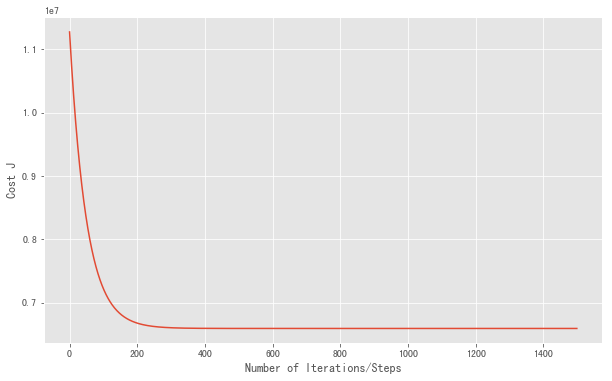

In [61]:
# theta for minimized cost J
weight , Cost_J = gradientDescent(X_train_normalized, y_train.values)

print('weight: ',weight.ravel())
plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations/Steps');

## 結論

1.資料預處理的方式越適當,regressor出來的r square的結果越接近理想值

2.多特徵值所表現出來的結果較為理想

3.建物移轉面積影響是影響總價元最大的特徵因素

4.其他要在更精確的預估,須在使用其他演算法在進行比較方能得出更精確的數據統計